# EDA + Missing values and Outliers - Detection and Treatment + Model Building

## Dataset Description

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.


This is a widely cited KNN dataset. I encountered it during my course, and I wish to share it here because it is a good starter example for data pre-processing and machine learning practices.


Fields
The dataset contains 16 columns

Target filed: Income
-- The income is divide into two classes: <=50K and >50K

Number of attributes: 14

In [1]:
#importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [2]:
df=pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 15)

In [4]:
df.info

<bound method DataFrame.info of        age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Marr

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Statistical Analysis

In [6]:
np.round(df.describe())

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.0,48842.0,48842.0,48842.0,48842.0,48842.0
mean,39.0,189664.0,10.0,1079.0,88.0,40.0
std,14.0,105604.0,3.0,7452.0,403.0,12.0
min,17.0,12285.0,1.0,0.0,0.0,1.0
25%,28.0,117550.0,9.0,0.0,0.0,40.0
50%,37.0,178144.0,10.0,0.0,0.0,40.0
75%,48.0,237642.0,12.0,0.0,0.0,45.0
max,90.0,1490400.0,16.0,99999.0,4356.0,99.0


In [7]:
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [8]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [9]:
df['income'] = df['income'].replace({'<=50K': 'low', '>50K': 'high'})

In [10]:
df['income'].value_counts()

low     37155
high    11687
Name: income, dtype: int64

### Divide columns into Categorical and Numerical Features

In [11]:
catg_var=[]
num_var=[]

for col in df.columns:
        if (df[col].dtypes == 'object'):
            catg_var.append(col)
        else:
            num_var.append(col)

In [12]:
catg_var

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [13]:
num_var

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

## Find and treat the missing values in each column

In [14]:
df[catg_var]

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,low
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,low
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,high
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,high
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,low
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,low
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,high
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,low
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,low


#### From the above categorical dataset there are 9 categorical columns.we observe that "?" seems to be inappropriate value or garbage value present .So lets try to impute it.

In [15]:
nulCol=[i for i in df[catg_var] if df[catg_var][df[catg_var][i]=="?"].shape[0]!=0]
nulCol

['workclass', 'occupation', 'native-country']

#### The above 3 columns have "?" garbage value

#### 1.Impute Work class column

In [16]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [17]:
df[df["workclass"]=="?"][["education","marital-status","relationship","race","gender","native-country"]].mode()

,education,marital-status,relationship,race,gender,native-country
0,Some-college,Never-married,Own-child,White,Male,United-States


In [18]:
colname="workclass"
pd.DataFrame([df[df["education"]=="Some-college"][colname].mode()[0],
df[df["marital-status"]=="Never-married"][colname].mode()[0],
df[df["relationship"]=="Own-child"][colname].mode()[0],
df[df["race"]=="White"][colname].mode()[0],
df[df["gender"]=="Male"][colname].mode()[0],
df[df["native-country"]=="United-States"][colname].mode()[0]]).mode()

,0
0,Private


#### Replacing "?" with mode of workclass with above values as filter in workclass column

In [19]:
df["workclass"].replace("?","Private",inplace=True)

In [20]:
df.workclass.unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

#### 2.Impute Occupation column

In [21]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [22]:
df[df["occupation"]=="?"][["education","marital-status","relationship","race","gender","native-country","workclass"]].mode()

,education,marital-status,relationship,race,gender,native-country,workclass
0,Some-college,Never-married,Own-child,White,Male,United-States,Private


In [23]:
colname="occupation"
pd.DataFrame([df[df["education"]=="Some-college"][colname].mode()[0],
df[df["marital-status"]=="Never-married"][colname].mode()[0],
df[df["relationship"]=="Own-child"][colname].mode()[0],
df[df["race"]=="White"][colname].mode()[0],
df[df["gender"]=="Male"][colname].mode()[0],
df[df["native-country"]=="United-States"][colname].mode()[0],
df[df["workclass"]=="Private"][colname].mode()[0]]).mode()

,0
0,Craft-repair


#### Replacing "?" with mode of occupation with above values as filter in workclass column

In [24]:
df["occupation"].replace("?","Craft-repair",inplace=True)

In [25]:
df["occupation"].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Craft-repair', 'Other-service', 'Prof-specialty', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [26]:
df['occupation'].value_counts()

Craft-repair         8921
Prof-specialty       6172
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

#### 3.Impute Native Country column

In [27]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [28]:
df[df["native-country"]=="?"][["education","marital-status","relationship","race","gender","workclass","occupation"]].mode()

,education,marital-status,relationship,race,gender,workclass,occupation
0,Bachelors,Married-civ-spouse,Husband,White,Male,Private,Prof-specialty


In [29]:
colname="native-country"
pd.DataFrame([df[df["education"]=="Bachelors"][colname].mode()[0],
df[df["marital-status"]=="Married-civ-spouse"][colname].mode()[0],
df[df["relationship"]=="Husband"][colname].mode()[0],
df[df["race"]=="White"][colname].mode()[0],
df[df["gender"]=="Male"][colname].mode()[0],
df[df["occupation"]=="Prof-specialty"][colname].mode()[0],
df[df["workclass"]=="Private"][colname].mode()[0]]).mode()

,0
0,United-States


#### Replacing "?" with mode of native country with above values as filter in workclass column

In [30]:
df["native-country"].replace("?","United-States",inplace=True)

In [31]:
df["native-country"].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [32]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Univariate Analysis

### Probability and Frequency Distribution of each Numerical Column using Dist Plot

In [33]:
print(num_var)

['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [34]:
def pdf(num_var):
    plt.figure(figsize=(15,6))
    ax = sns.distplot(df[num_var],
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 50,'alpha':1,'color':'#da70d6'})
    ax.set(xlabel=' {}'.format(num_var), ylabel='Frequency',title="PDF of {}".format(num_var))
    
    plt.show()


#### PDF of fnlwgt column

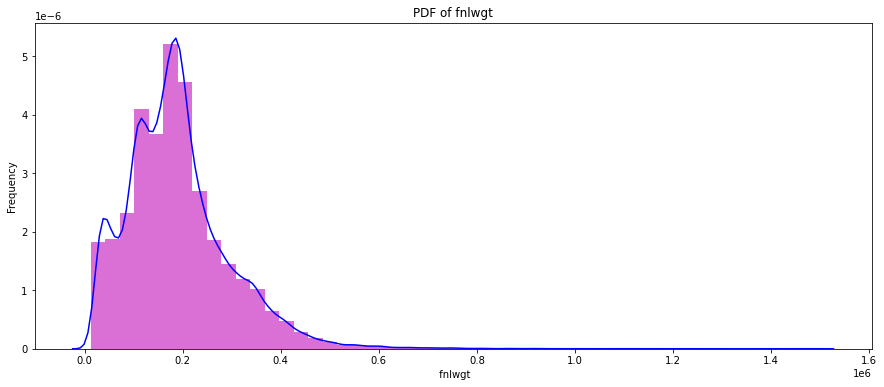

In [35]:
pdf('fnlwgt')

##### As we can see from the graph that there is a long tail towards right side so it may be log normal distribution

#### PDF of Age column

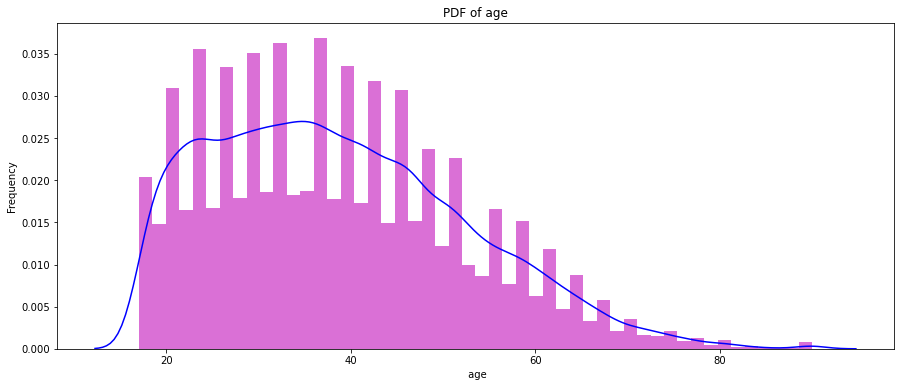

In [36]:
pdf('age')

##### As we can see from the graph that there is a thick tail towards right side so it is positively skewed distribution

#### PDF of Educational num column

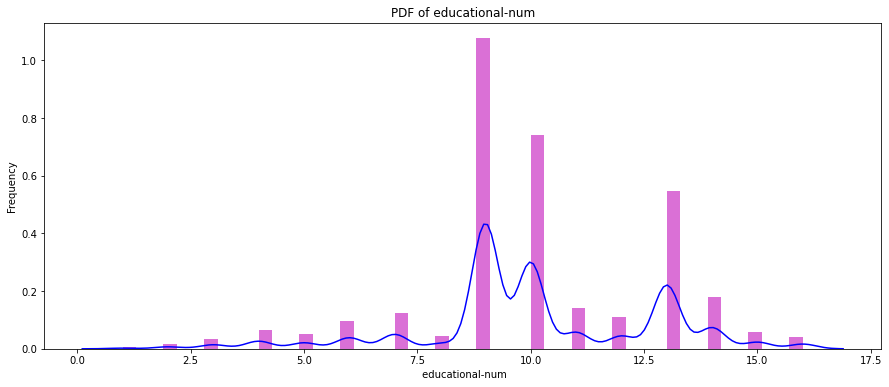

In [37]:
pdf('educational-num')

#### PDF of Capital gain column

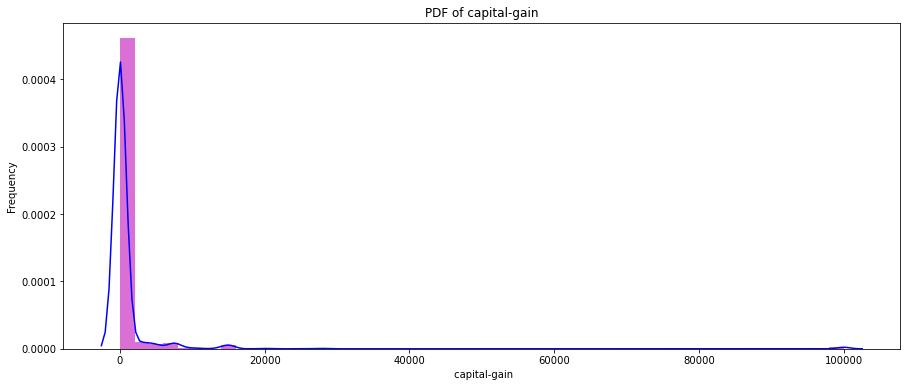

In [38]:
pdf('capital-gain')

#### PDF of Capital loss column

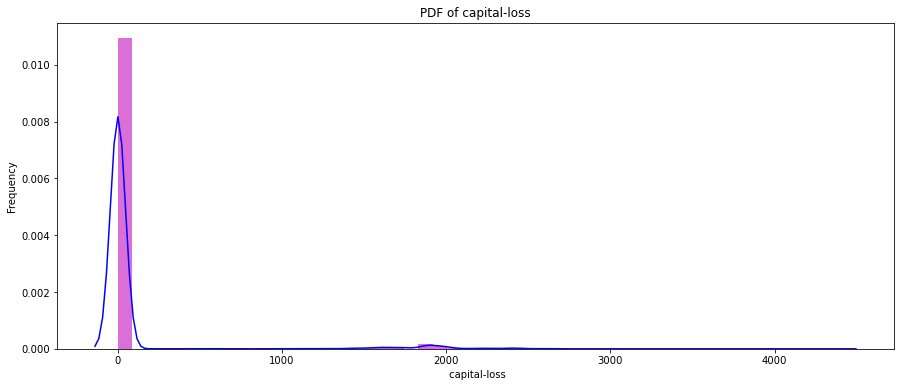

In [39]:
pdf('capital-loss')

#### PDF of hours per week column

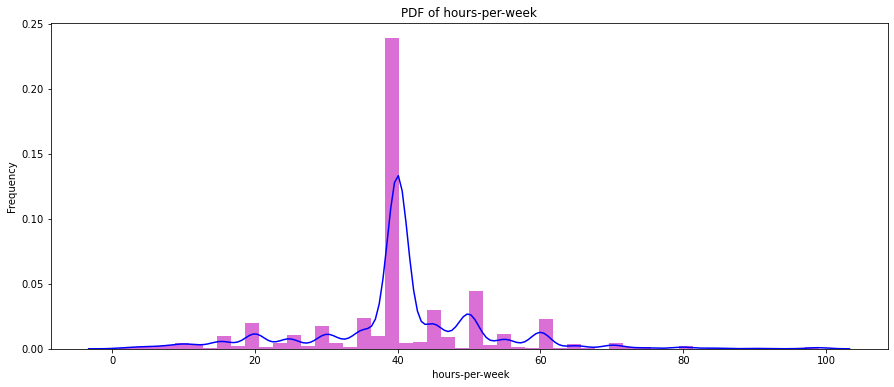

In [40]:
pdf('hours-per-week')

### Frequency Distribution of each Categorical Variable by using Count Plot.

In [41]:
print(catg_var)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [42]:
def catg(catg_var):
    plt.figure(figsize=(15,5))
    plt.xticks(rotation = 90)
    ax=sns.countplot(df[catg_var].dropna(), order=df[catg_var].value_counts().iloc[:15].index)
    for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+50))

#### Count plot of workclass

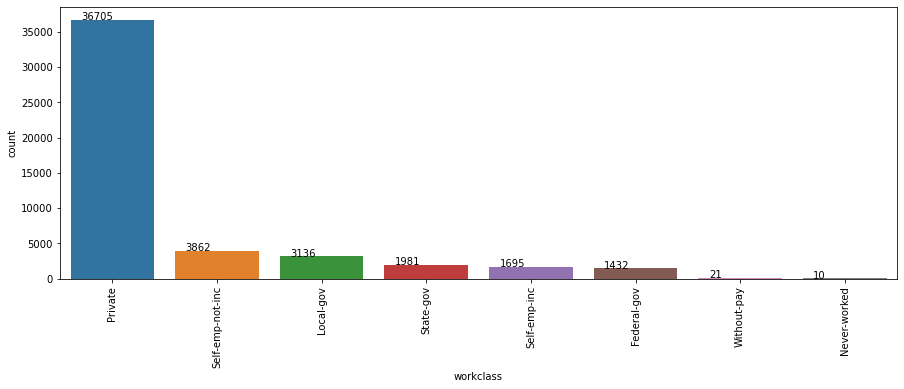

In [43]:
catg('workclass')

#### From the above plot we see that private is more in workclass

### Count plot of Education

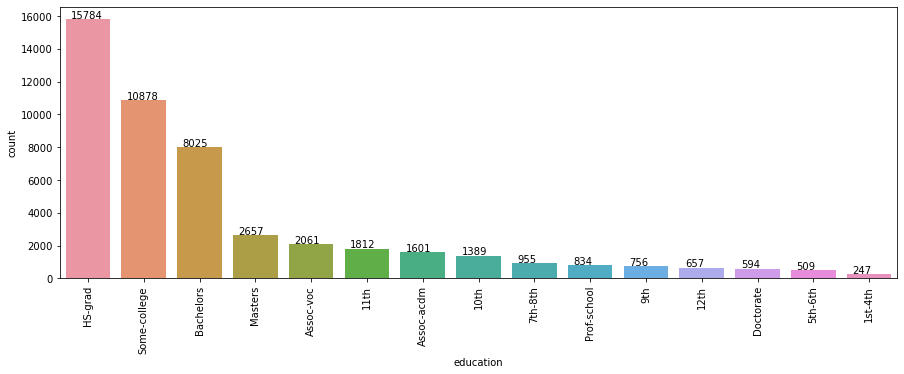

In [44]:
catg('education')

#### From the above plot we see that most of the education is HS-grad

### Count plot of Marital status

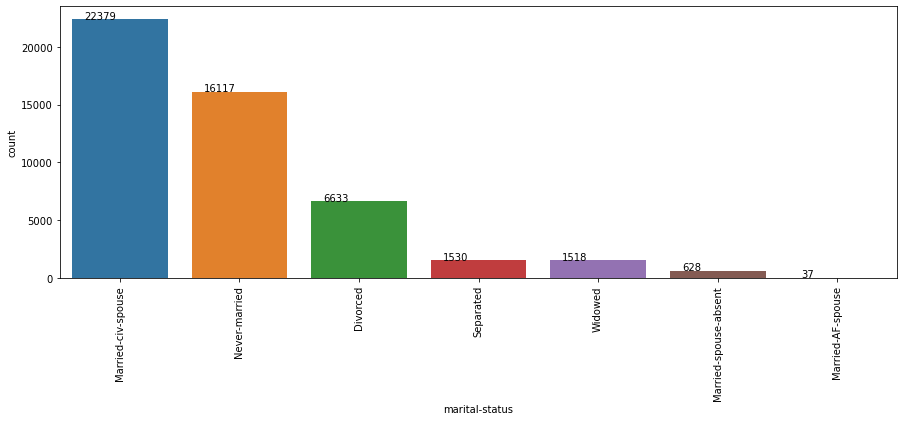

In [45]:
catg('marital-status')

#### From the above plot we see that most of the marital status is Married-civ-spouse

### Count plot of Occupation

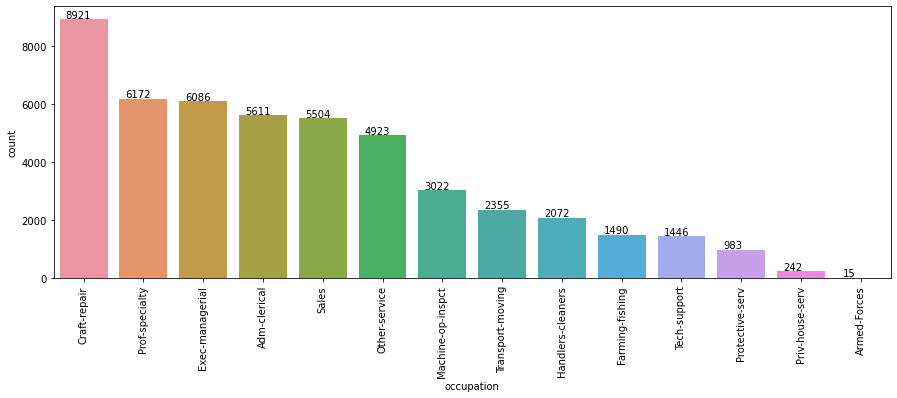

In [46]:
catg('occupation')

#### From the above plot we consider the most frequent occupation is craft repair

### Count plot of relationship

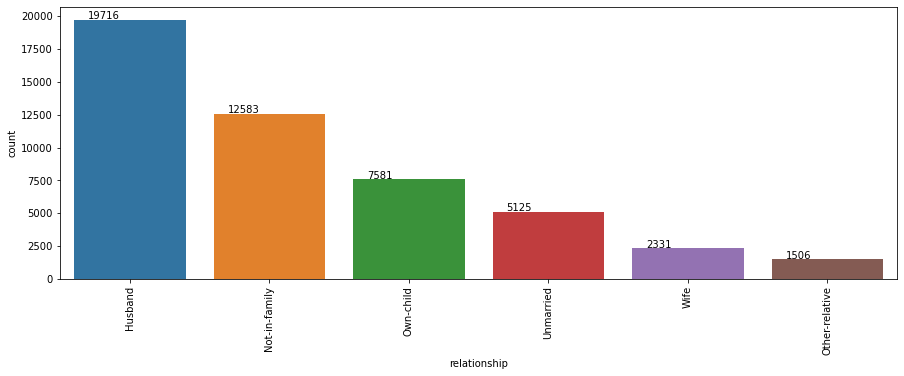

In [47]:
catg('relationship')

### Count plot of race

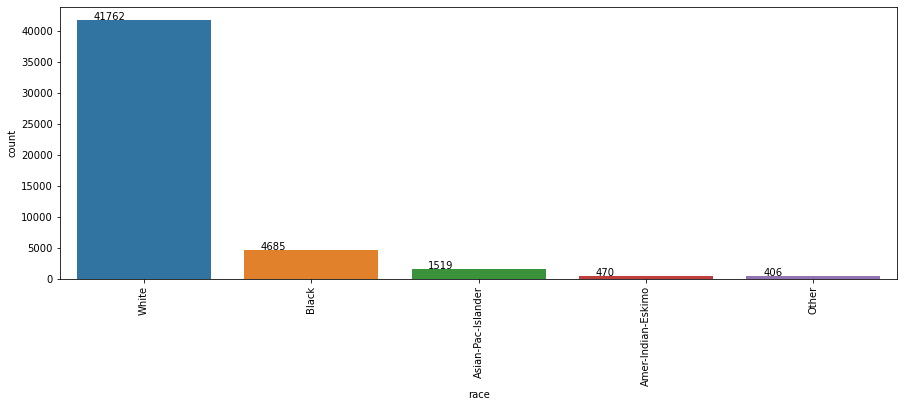

In [48]:
catg('race')

#### From the above plot we consider that the most frequent race of the candidates is white

### Count plot of Gender

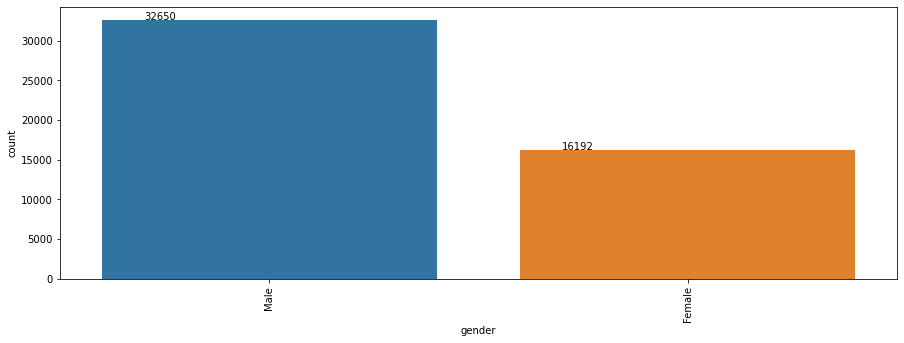

In [49]:
catg('gender')

### Count plot of Native country

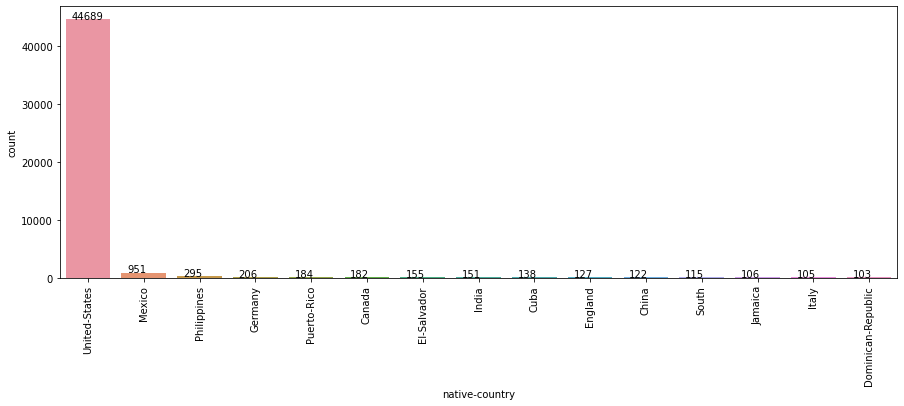

In [50]:
catg('native-country')

### Count plot of income

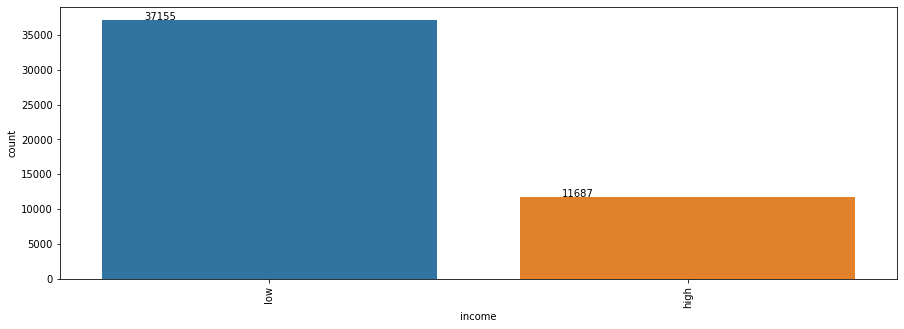

In [51]:
catg('income')

## BiVariate Analysis

### Relation Between Numerical Columns using Scatter plot

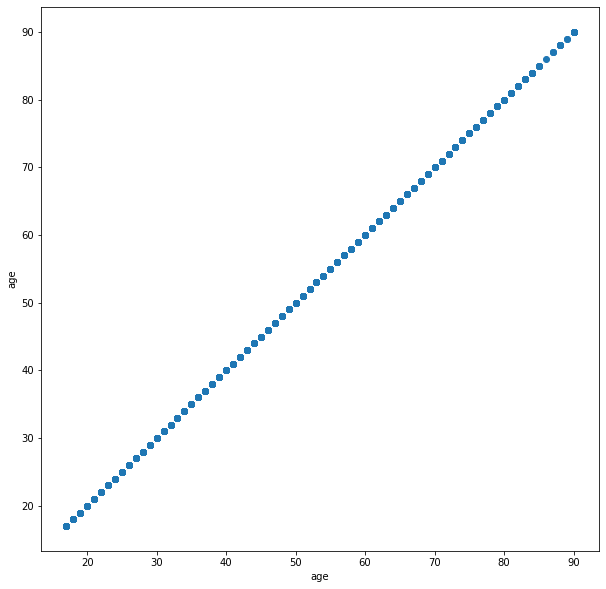

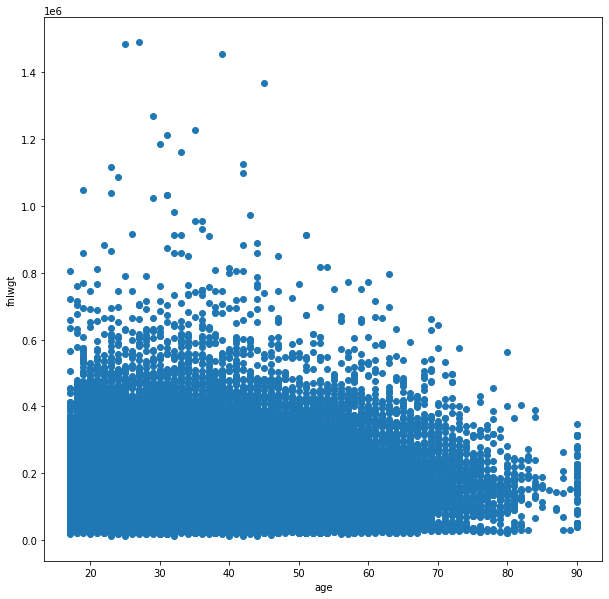

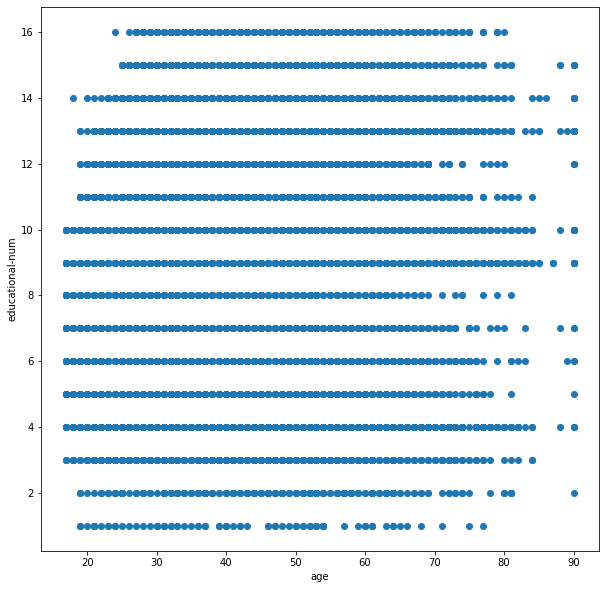

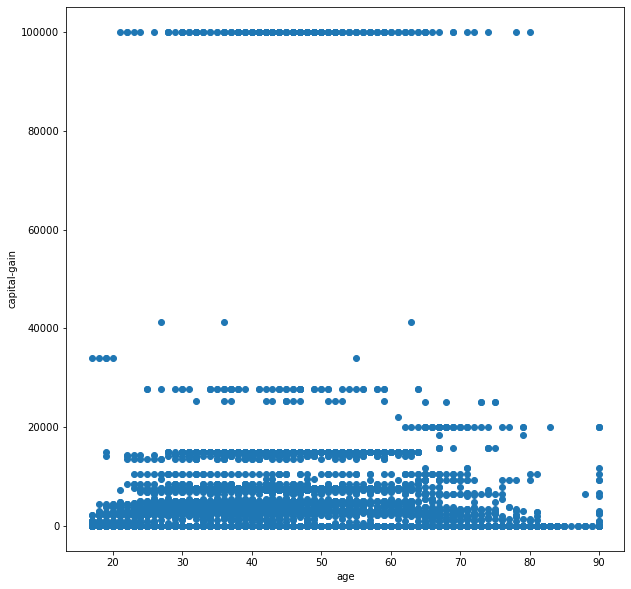

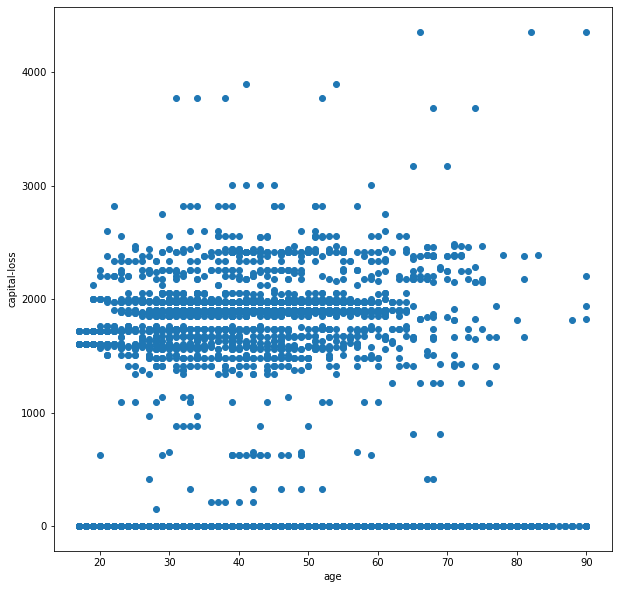

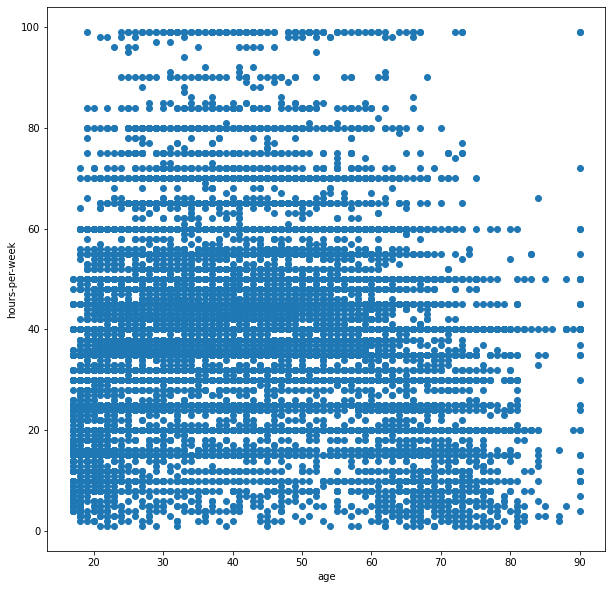

In [52]:
for i in num_var:
    plt.figure(figsize=(10,10))
    plt.xlabel('age')
    plt.ylabel(i)
    x=df['age']
    y=df[i]
    plt.scatter(x,y)

### Relation Between Numerical Columns using pair plot

<Figure size 1440x1080 with 0 Axes>

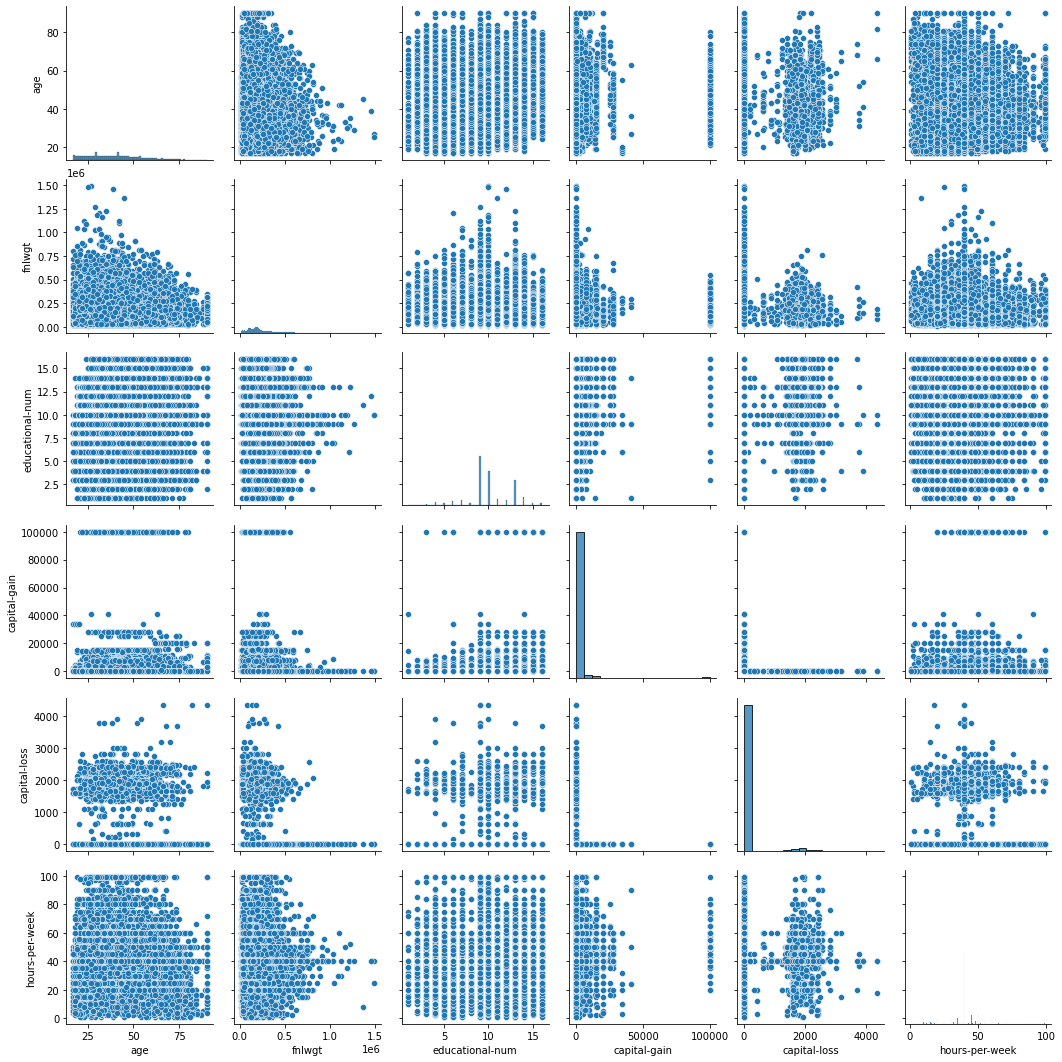

In [53]:
plt.figure(figsize=(20,15))
sns.pairplot(df[num_var])
plt.show()

### Relation Between Continous variables

In [54]:
df['capital-gain'].corr(df['capital-loss'])

-0.03144077064746346

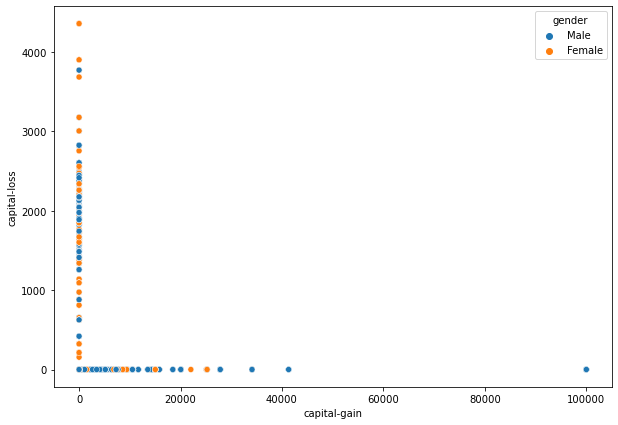

In [55]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="capital-gain",y="capital-loss",data=df,hue="gender")
plt.show()

#### capital gaiv vs hours per week

In [56]:
df['capital-gain'].corr(df['hours-per-week'])

0.08215727805587883

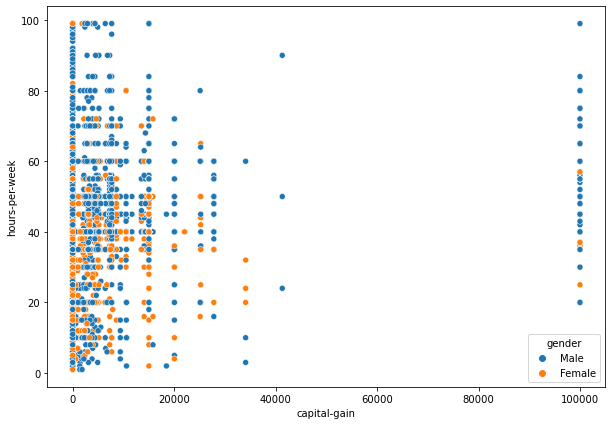

In [57]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="capital-gain",y="hours-per-week",data=df,hue="gender")
plt.show()

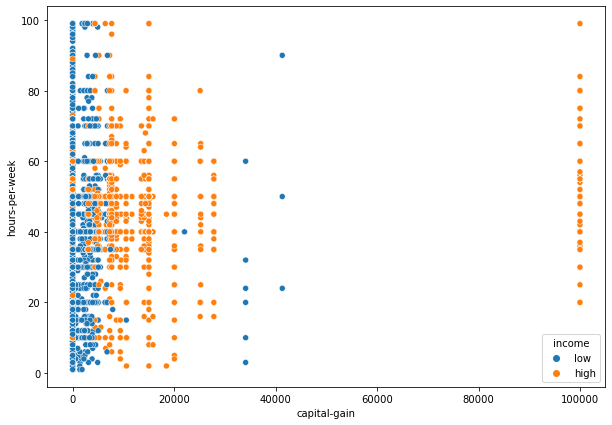

In [58]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="capital-gain",y="hours-per-week",data=df,hue="income")
plt.show()

#### age vs workclass based on gender

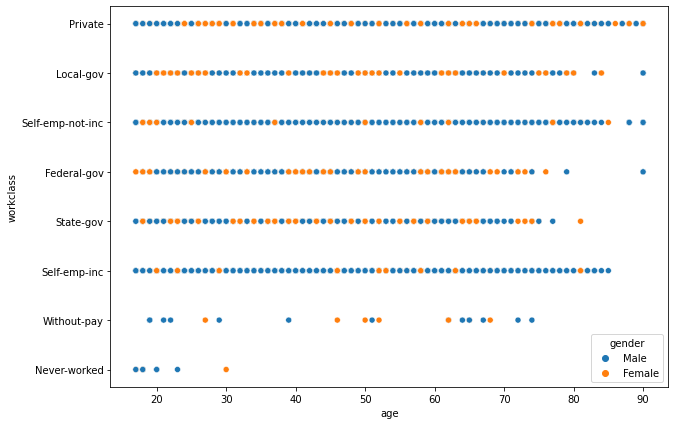

In [59]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="age",y="workclass",data=df,hue="gender")
plt.show()

### Age Relationship with Income

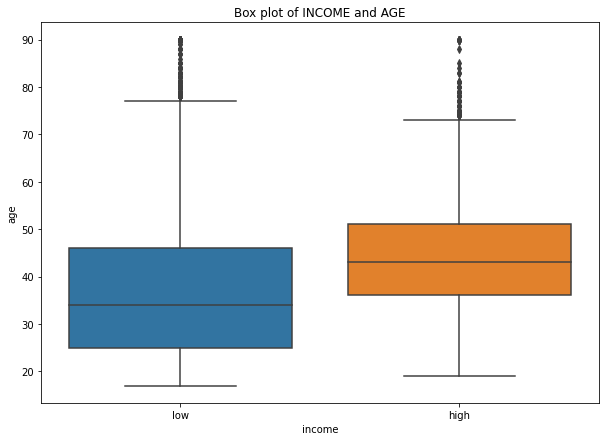

In [60]:
fig = plt.figure(figsize=(10,7))
sns.boxplot(x='income',y='age',data=df).set_title('Box plot of INCOME and AGE')
plt.show()

### Hours per week relationship with income

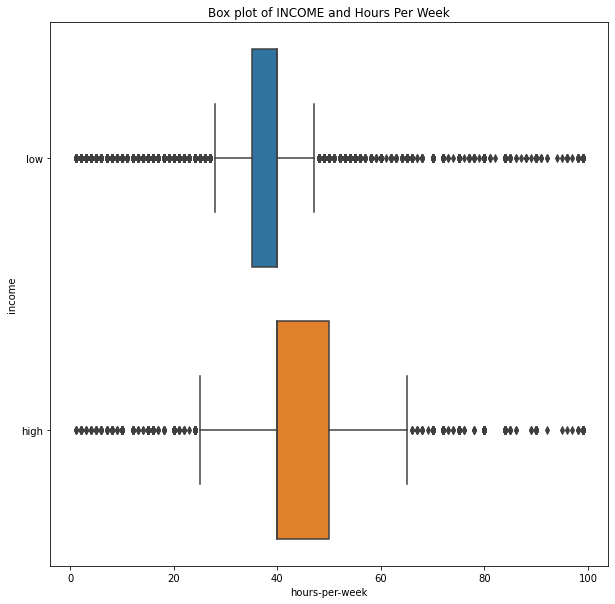

In [61]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='hours-per-week',y='income',data=df).set_title('Box plot of INCOME and Hours Per Week')
plt.show()

### Workclass Relationship with Income

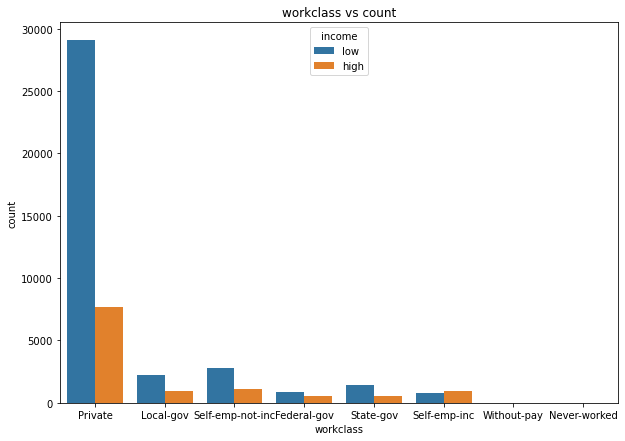

In [62]:
fig = plt.figure(figsize=(10,7))
sns.countplot(x='workclass',hue ='income',data=df).set_title("workclass vs count")
plt.show()

### Relationship between occupation and income

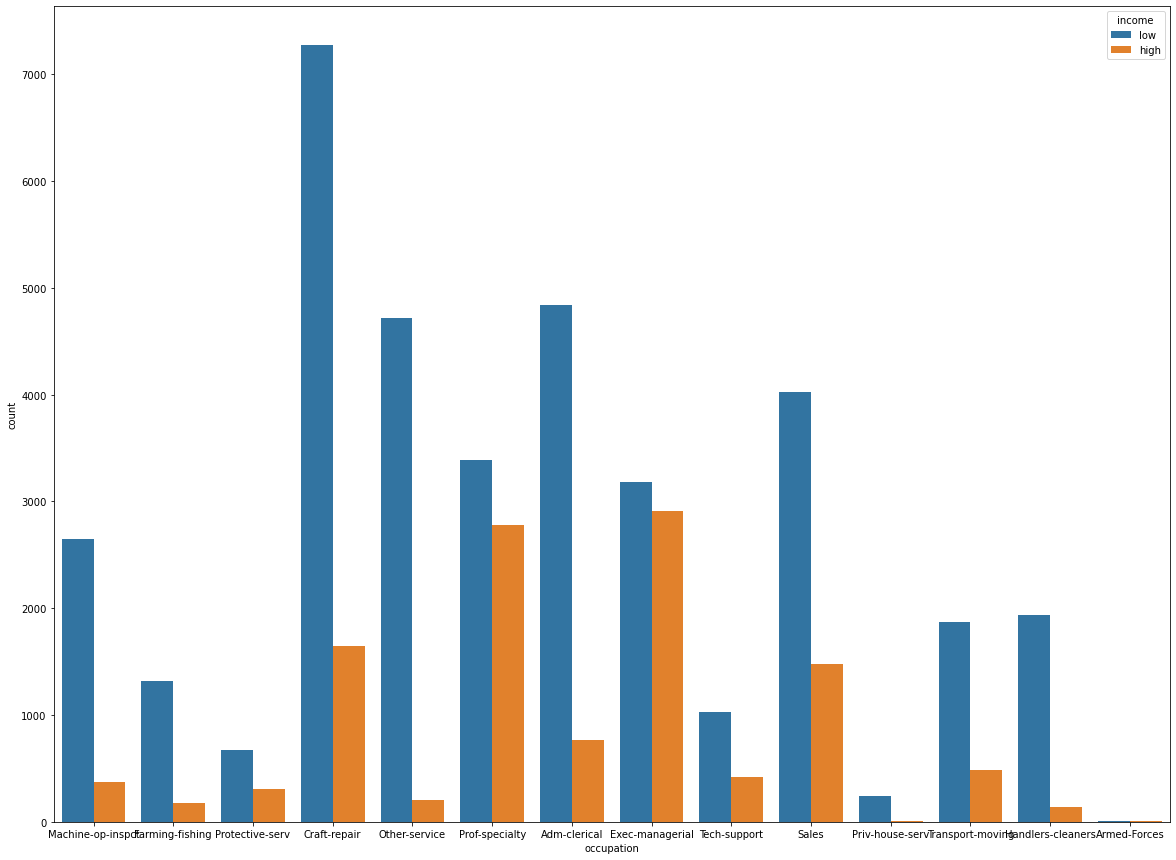

In [63]:
plt.figure(figsize=(20,15))
sns.countplot(x="occupation", hue="income",data=df)
plt.show()

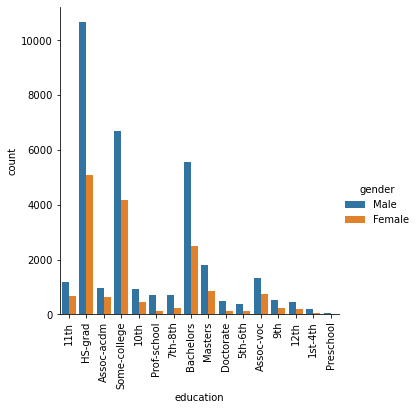

In [64]:
sns.catplot(x = "education",hue="gender",data = df,kind='count')
plt.xticks(rotation=90)
plt.show()

### Swarm Plot

<AxesSubplot:xlabel='age', ylabel='fnlwgt'>

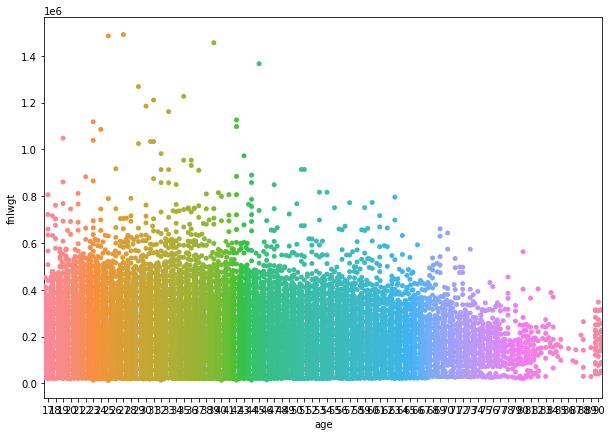

In [65]:
plt.figure(figsize=(10,7))
sns.swarmplot(data = df, x='age', y='fnlwgt')

### Correlation between the features using corr() function

In [66]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


### Correlation between the features using Heatmap

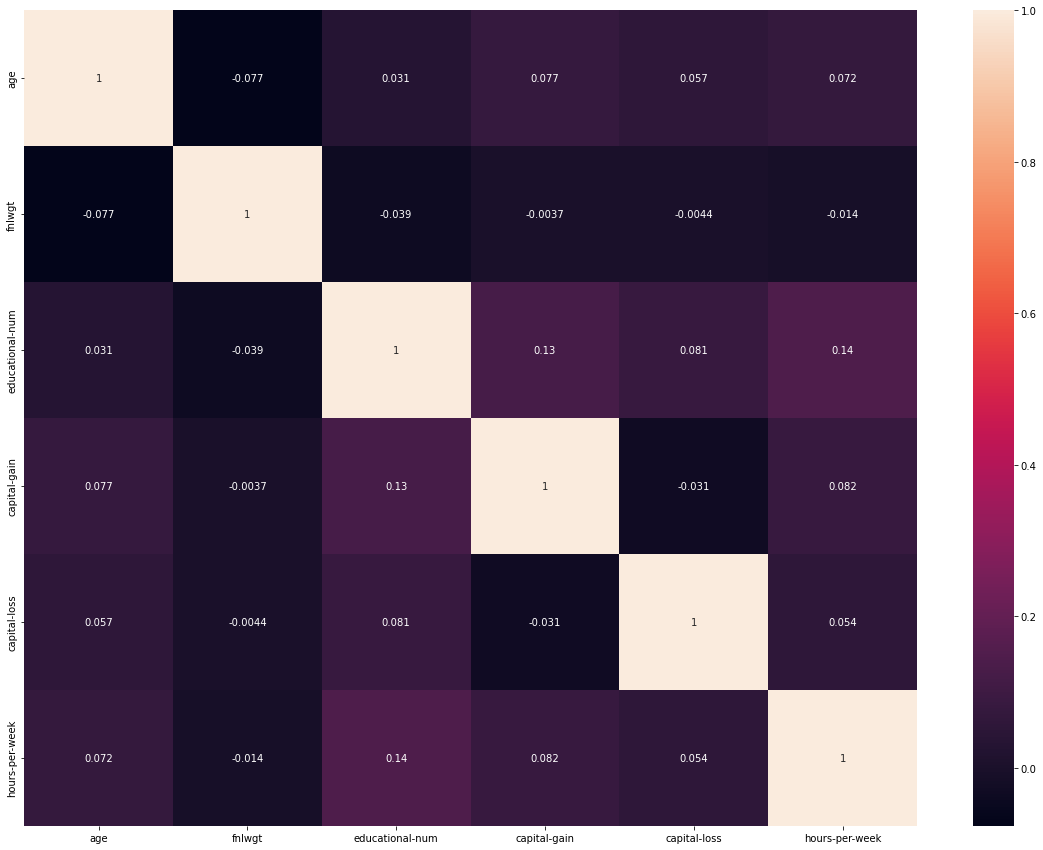

In [67]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr() , annot=True)
plt.show()

## Find and Impute Number of Outliers in Each numeric column

In [68]:
outliers = pd.DataFrame(columns=['Feature','Outliers','Percentage']) 
    
for column in list(num_var):  
    # first quartile
    q1 = df[column].quantile(0.25)
    # third quartile
    q3 = df[column].quantile(0.75) 
    # Inter Quantile Range
    iqr = q3 - q1 
        
    lower_value = q1 - (1.5*iqr)        
    upper_value = q3 + (1.5*iqr)
        
    total_outlier = df[(df[column] < lower_value) | (df[column] > upper_value)].shape[0]    
    percent = (total_outlier / len(df[column])) * 100
    outliers = outliers.append({'Feature':column,'Outliers':total_outlier,'Percentage':percent},ignore_index=True)
        
outliers

,Feature,Outliers,Percentage
0,age,216,0.442242
1,fnlwgt,1453,2.974899
2,educational-num,1794,3.673068
3,capital-gain,4035,8.261332
4,capital-loss,2282,4.672208
5,hours-per-week,13496,27.631956


### In hours-per-week column we have many outliers which have to be treated

### Box-plot of hours-per-week column

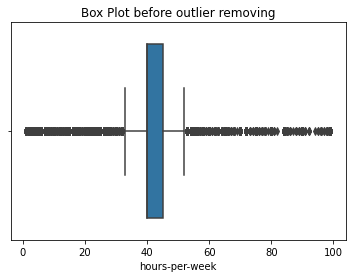

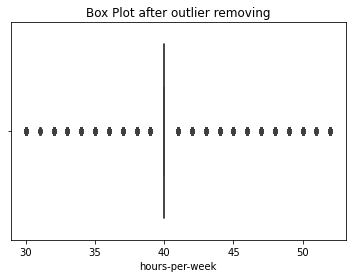

In [71]:
sns.boxplot(df['hours-per-week'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'hours-per-week')
sns.boxplot(df['hours-per-week'])
plt.title("Box Plot after outlier removing")
plt.show()

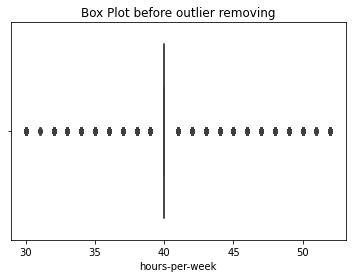

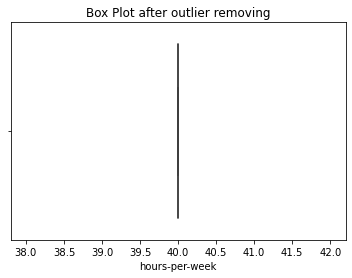

In [78]:
sns.boxplot(df['hours-per-week'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'hours-per-week')
sns.boxplot(df['hours-per-week'])
plt.title("Box Plot after outlier removing")
plt.show()

### Box-plot of educational-num column

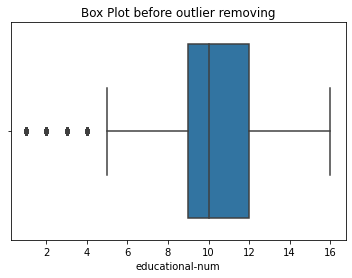

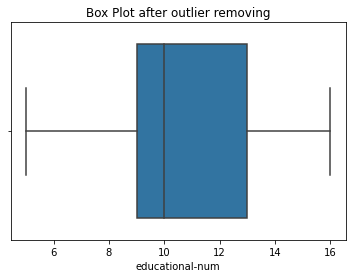

In [72]:
sns.boxplot(df['educational-num'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'educational-num')
sns.boxplot(df['educational-num'])
plt.title("Box Plot after outlier removing")
plt.show()

### Box plot of capital gain column

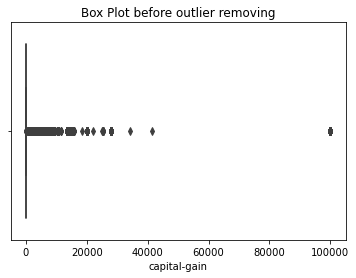

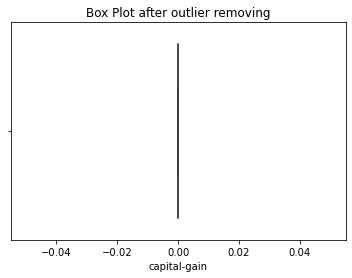

In [73]:
sns.boxplot(df['capital-gain'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'capital-gain')
sns.boxplot(df['capital-gain'])
plt.title("Box Plot after outlier removing")
plt.show()

### Box plot of capital loss column

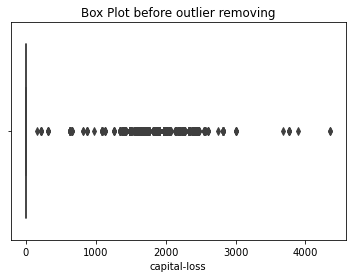

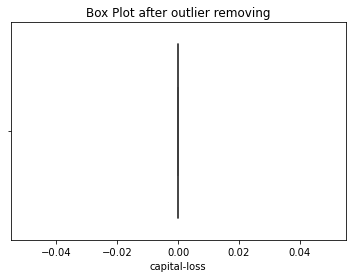

In [74]:
sns.boxplot(df['capital-loss'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'capital-loss')
sns.boxplot(df['capital-loss'])
plt.title("Box Plot after outlier removing")
plt.show()

### Box plot of fnlwgt column

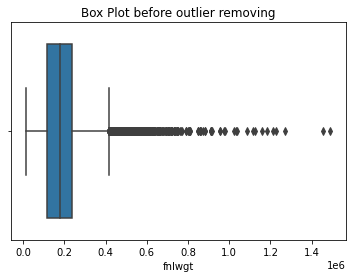

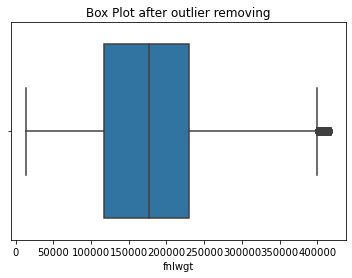

In [75]:
sns.boxplot(df['fnlwgt'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'fnlwgt')
sns.boxplot(df['fnlwgt'])
plt.title("Box Plot after outlier removing")
plt.show()

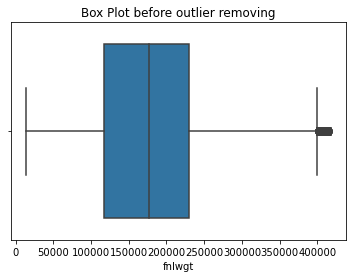

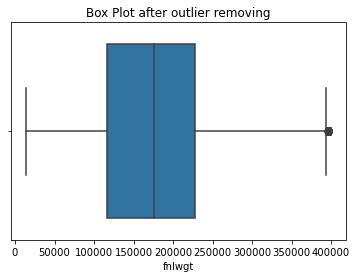

In [76]:
sns.boxplot(df['fnlwgt'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'fnlwgt')
sns.boxplot(df['fnlwgt'])
plt.title("Box Plot after outlier removing")
plt.show()

### Box plot of age column

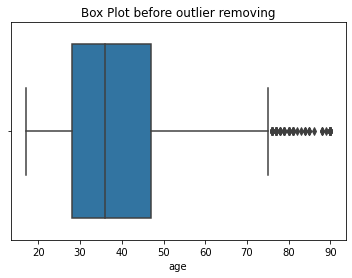

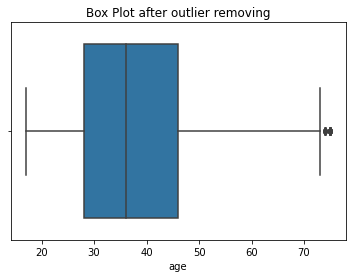

In [77]:
sns.boxplot(df['age'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'age')
sns.boxplot(df['age'])
plt.title("Box Plot after outlier removing")
plt.show()

## Feature Transformation

### Standardization for Numerical Features

In [79]:
# Column standardization using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [80]:
num=df[num_var]
df_num = pd.DataFrame(scaler.fit_transform(num),columns = num.columns)
df_num.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,0.137931,0.553182,0.181818,0.0,0.0,0.0
1,0.189655,0.839205,0.636364,0.0,0.0,0.0
2,0.206897,0.553763,0.363636,0.0,0.0,0.0
3,0.120690,0.924158,0.454545,0.0,0.0,0.0
4,0.327586,0.515953,0.727273,0.0,0.0,0.0


### One hot Encoding for Categorical Features

In [81]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

In [82]:
catg = df[catg_var]
df_catg = pd.DataFrame(encoder.fit_transform(catg), 
                      columns=encoder.get_feature_names(catg.columns))
df_catg.head()

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_9th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_low
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Dataset after Feature Transformation

In [83]:
new_df = pd.concat([df_num,df_catg], axis = 1)
new_df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_low
0,0.137931,0.553182,0.181818,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.189655,0.839205,0.636364,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.206897,0.553763,0.363636,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.120690,0.924158,0.454545,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.327586,0.515953,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Split the dataset into train and test

In [84]:
df1 = new_df.iloc[:,:-1] 
target = new_df.iloc[:,-1]

In [85]:
df1

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.137931,0.553182,0.181818,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.189655,0.839205,0.636364,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.206897,0.553763,0.363636,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.120690,0.924158,0.454545,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.327586,0.515953,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18418,0.258621,0.052705,0.090909,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18419,0.620690,0.800031,0.818182,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18420,0.086207,0.769616,0.454545,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18421,0.396552,0.365108,0.363636,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [86]:
target

0        1.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
18418    1.0
18419    0.0
18420    1.0
18421    0.0
18422    1.0
Name: income_low, Length: 18423, dtype: float64

In [87]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(df1, target, test_size = 0.3)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score

In [90]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
                                   
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(name + " : {:.2f}%".format(accuracy_score(y_pred,y_test)*100))


                   Logistic Regression : 85.65%
                   K-Nearest Neighbors : 83.26%
                         Decision Tree : 80.13%
Support Vector Machine (Linear Kernel) : 85.87%
   Support Vector Machine (RBF Kernel) : 85.38%
                        Neural Network : 85.13%
                         Random Forest : 84.40%
                     Gradient Boosting : 85.69%
